# K-nearest neighbors na Regressão
   Assim como antes nos problemas de classificação podemos utilizar a distância euclidiana para calcular a distância entre as instâncias porem a diferença reside na forma em que será calculado o valor para se associar a instância que está sendo testada.
   Invés de usarmos aquela classe que aparece com mais frequência(classe dominante) no vetor dos vizinhos mais próximos, pegaremos uma média dos valores dessas instâncias. A saída é um valor numérico. Este valor será uma medida de posição dos valores dos seus vizinhos mais próximos, por exemplo a média ou mediana.

In [2]:
import pandas as pd
dataset_train = pd.read_csv('../../data/modified/blogData_newTrain.csv') # Importing train dataframe
dataset_test = pd.read_csv('../../data/modified/blogData_newTest.csv') # Importing test dataframe

In [3]:
# select test data
x_test = dataset_test.iloc[:, 0:-1]
y_test = dataset_test.iloc[:,-1]

# selects train data
x_train = dataset_train.iloc[:,0:-1]
y_train = dataset_train.iloc[:,-1]

In [5]:
print("Train: % " + str(len(x_train)/(len(x_train) + len(x_test)))) # % de treino
print("Test: % " + str(len(x_test)/(len(x_train) + len(x_test)))) # % de teste

0.8729777911064461
0.12702220889355392


## Definindo o melhor K para o KNN

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

init = time.time()

neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
cv = cross_val_score(neigh,x_test, y_test,scoring='r2')
neigh_score = neigh.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(neigh_score))
print(cv)
print('MAE: {}'.format(mae))

Execution time: 3.7540805339813232 seconds
R2 score: 0.35112371914498
[ 0.43472666  0.33559133  0.34675241]
MAE: 5.693001632272356


## K Fold

In [7]:
import numpy as np

k = 10  # 10-fold
scores = cross_val_score(neigh,x_test, y_test,cv= k)
print(scores)
hite_rate = np.mean(scores) 
print("Mean : " + str(hite_rate))

[ 0.49325643 -0.11492141  0.70225846  0.38511923  0.44767236  0.17601162
  0.30905143  0.28900797  0.37265761  0.43172241]
Mean : 0.349183611316


## Predições em relação ao resultado original

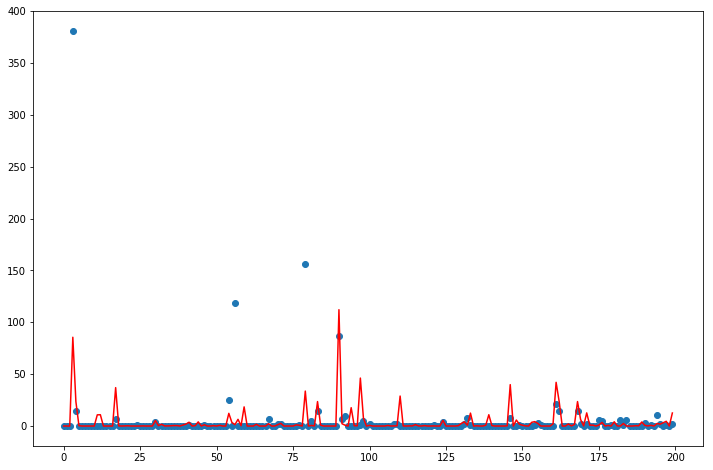

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.show()